**Conceptual Aerospace Systems Design - Mission**
<br>
**Launch Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Inputs
alt = 500
inc = 98

In [3]:
# Constants
mu = 3.986e14
omega_earth = 2*math.pi/86400
Re = 6378100
Veq = omega_earth*Re
V0 = math.sqrt(mu/Re)
g = 9.80665
Sw = 10000

In [4]:
# Creating DataFrame with Relevant Elements
altitude = np.arange(0,601000,1000).repeat(101/0.25)
inclination = np.array(list(np.arange(0,101,0.25))*601)
df = pd.DataFrame(data = {'altitude': altitude, 'inclination' : inclination})

In [5]:
# Yasny Launch Base
lat = 51.09388889
df['latitude'] = lat

In [6]:
# Functions:
def dv_e_rot(alt, lat):
    dv = Re*omega_earth*math.cos(math.radians(lat))
    return dv

def dv_orbit(alt):
    dv = math.sqrt(mu/Re)*math.sqrt((Re + 2*alt)/(Re + alt))
    return dv

def V_orbit(alt):
    V = math.sqrt(mu/(Re + alt))
    return V

def time_period(alt):
    # T is in Hours
    T = (2*math.pi*math.sqrt((Re + alt)**3/mu))/3600
    return T

def launch_azimuth(lat, inc):
    if lat>inc:
        return np.nan
    else:
        VL = 464.5*math.cos(math.radians(lat))
        beta_I = math.asin((math.cos(math.radians(inc)))/(math.cos(math.radians(lat))))
        gamma = (VL*math.cos(beta_I))/(V0 - Veq*math.cos(math.radians(inc)))
        beta = math.degrees(beta_I + gamma)
    return beta

In [7]:
# Run Calculation on DataFrame
df['dV_orbit'] = df.apply(lambda x: dv_orbit(x.altitude), axis=1)
df['dV_e_rot'] = df.apply(lambda x: dv_e_rot(x.altitude, x.latitude), axis=1)
df['dV_total'] = df.apply(lambda x: (x.dV_orbit + x.dV_e_rot), axis=1)
df['V_orbit'] = df.apply(lambda x: V_orbit(x.altitude), axis=1)
df['time_period_hrs'] = df.apply(lambda x: time_period(x.altitude), axis=1)
df['launch_azimuth'] = df.apply(lambda x: launch_azimuth(x.latitude, x.inclination), axis=1)

## Create Final DataFrame
df_final = df.dropna(how='any').reset_index(drop='true')

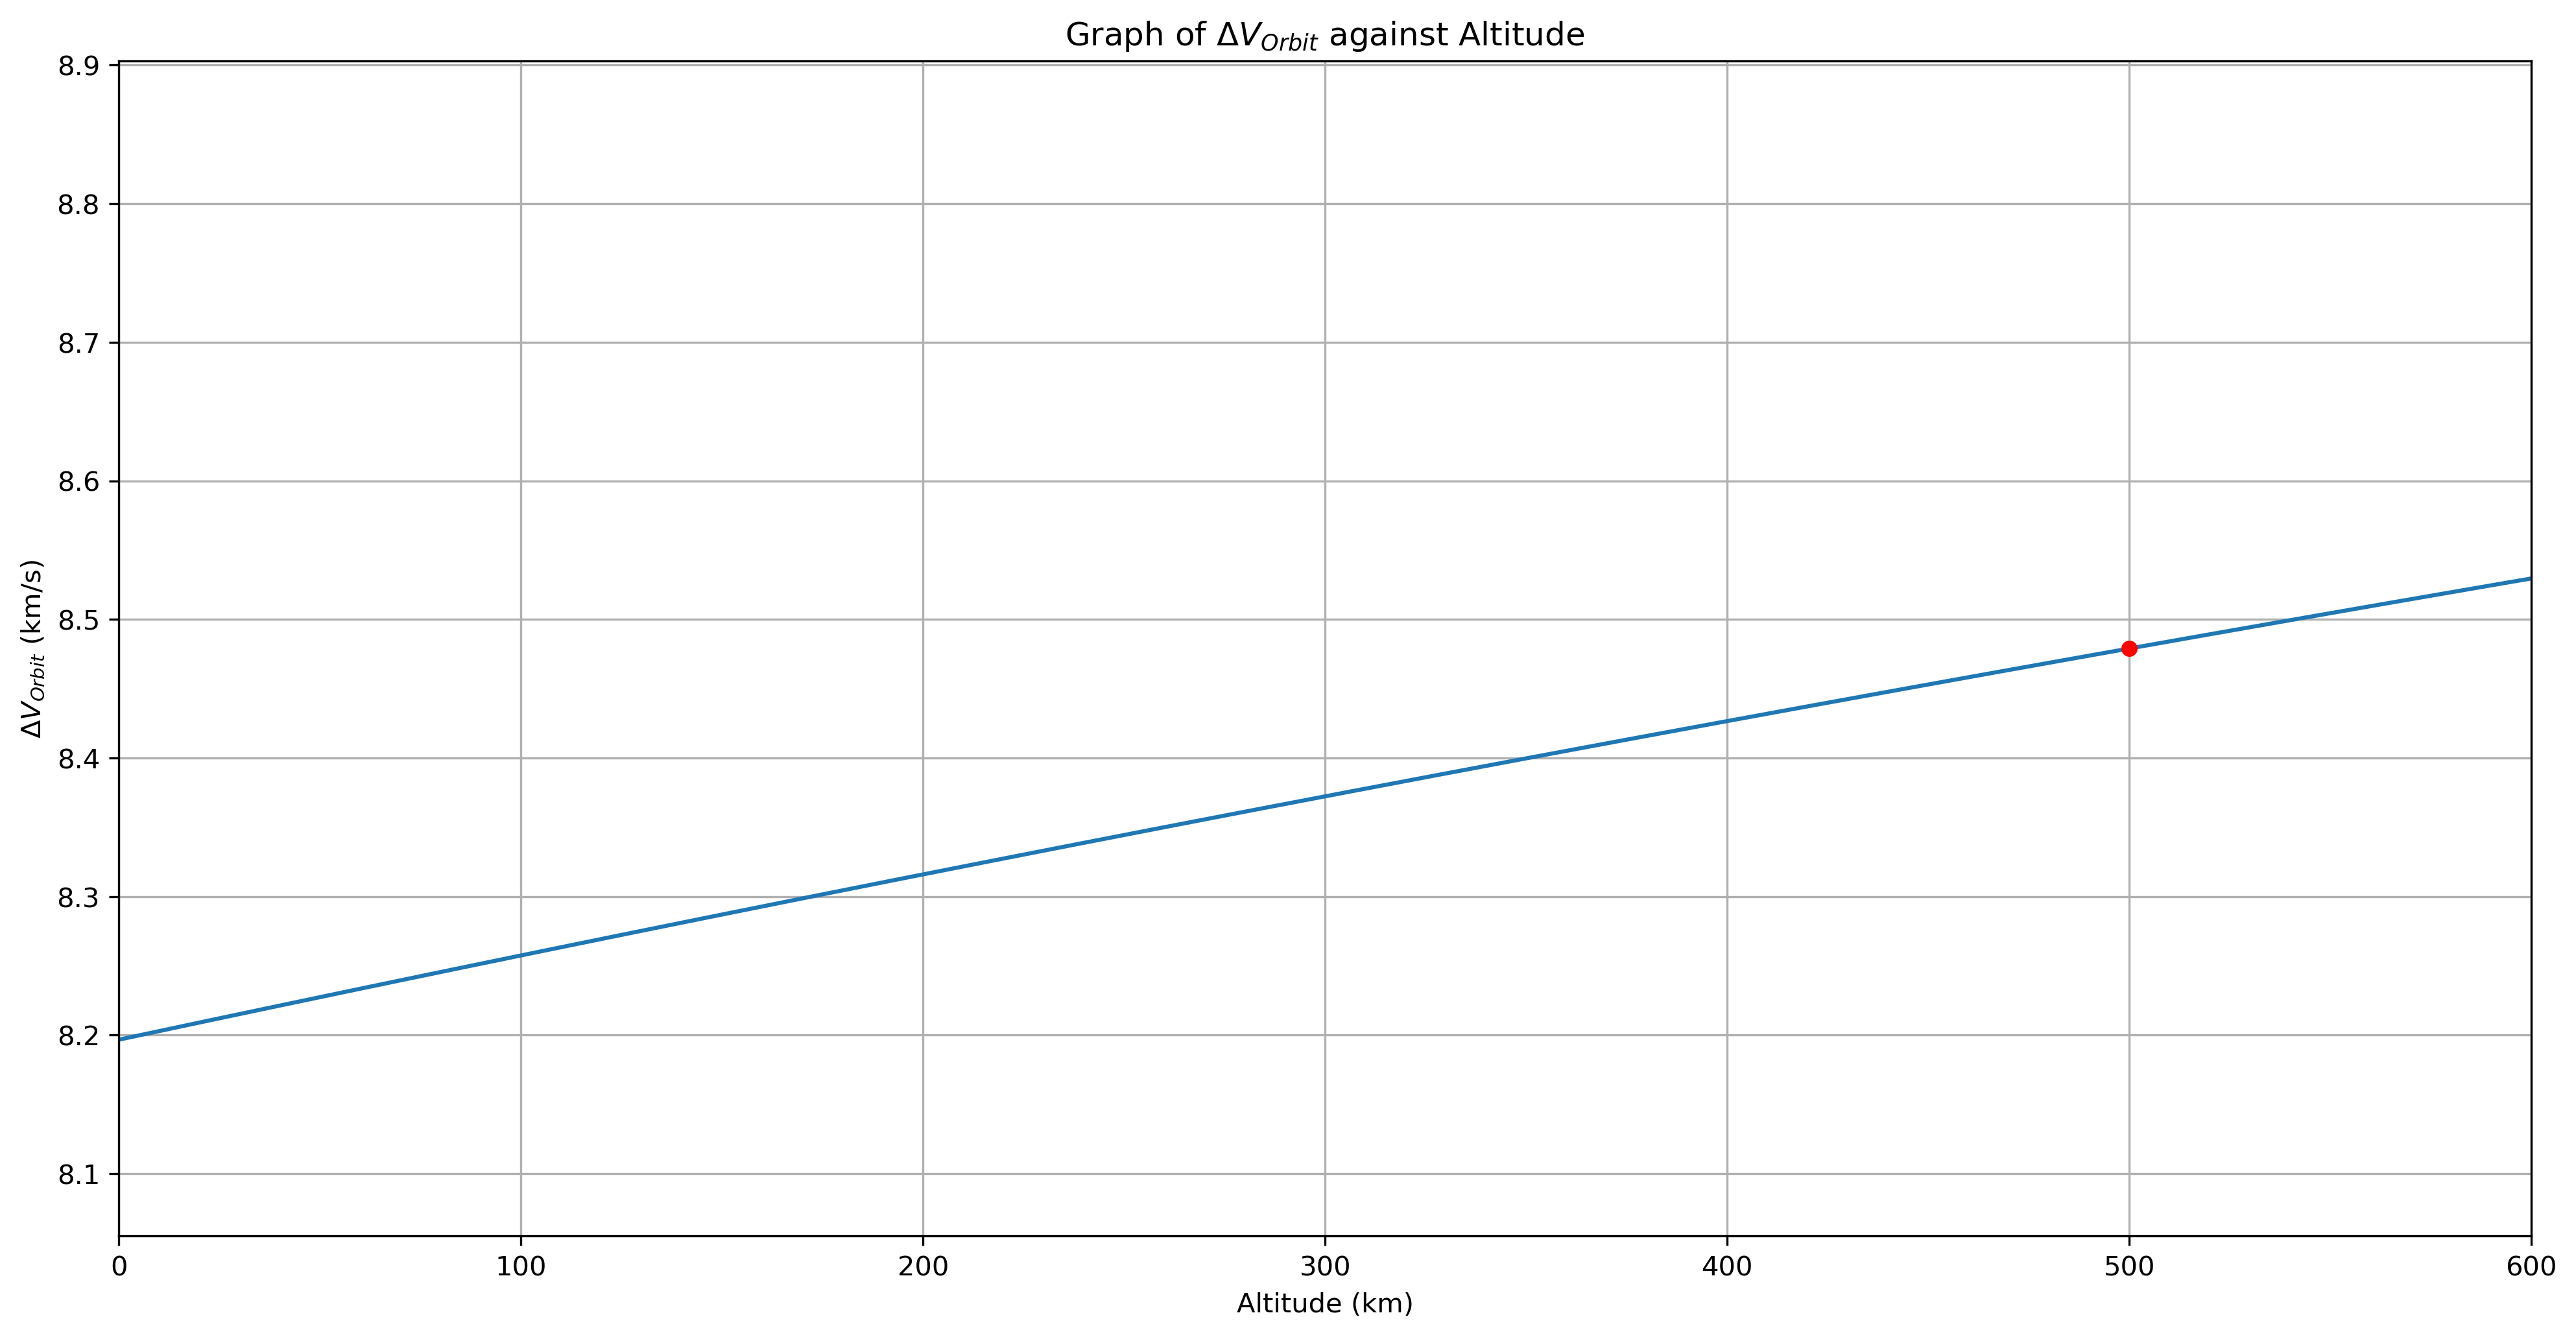

In [20]:
# Plot of ΔV Required against Altitude
fig = plt.figure(figsize=(16,8), dpi = 300)

# For Chosen Altitude:
total_dv_req = dv_orbit(alt*1000) + dv_e_rot(alt*1000, lat)

plt.plot(df.altitude/1000, df.dV_total/1000)
plt.plot(alt, total_dv_req/1000, 'ro', markersize=5)

plt.title('Graph of $ΔV_{Orbit}$ against Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('$ΔV_{Orbit}$ (km/s)')

plt.xlim(0,alt*1.2)
plt.ylim((total_dv_req/1000)*0.95,(total_dv_req/1000)*1.05)
plt.grid(True)

plt.show()

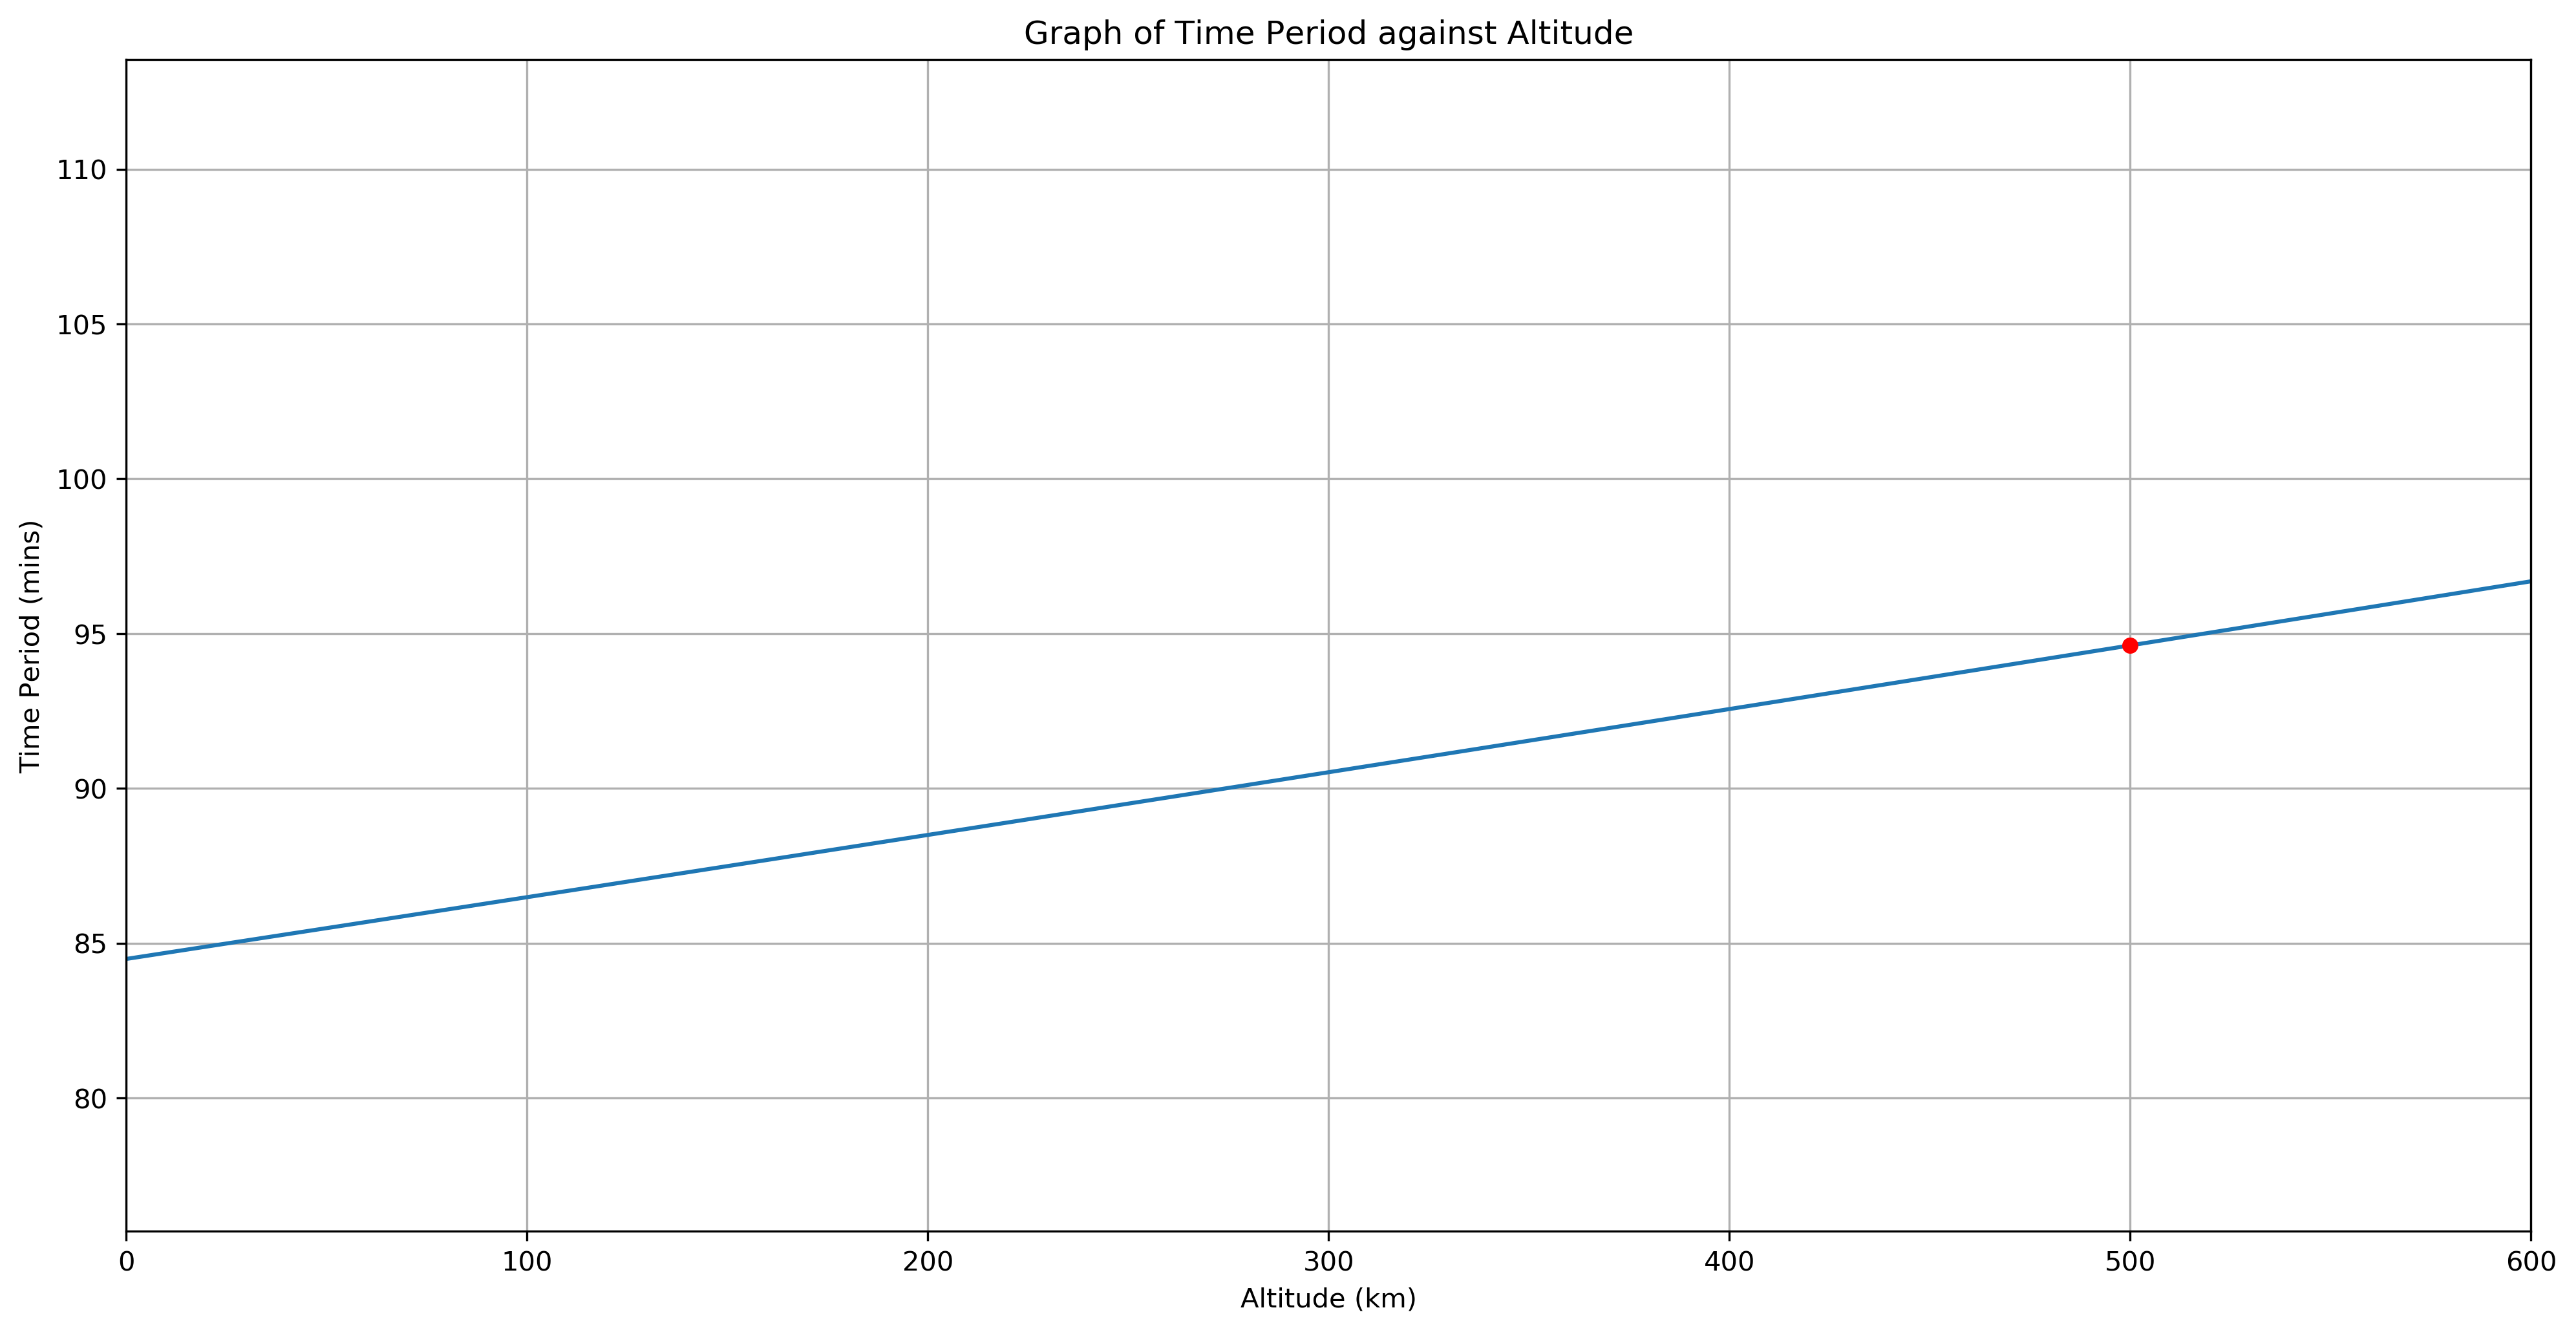

In [14]:
# Plot of Time Period against Altitude
fig = plt.figure(figsize=(16,8), dpi = 300)

# For Chosen Altitude:
time_alt = time_period(alt*1000)*60

plt.plot(df.altitude/1000, df.time_period_hrs * 60)
plt.plot(alt, time_alt, 'ro', markersize=5)

plt.title('Graph of Time Period against Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Time Period (mins)')

plt.xlim(0,alt*1.2)
plt.ylim(time_alt*0.8, time_alt*1.2)
plt.grid(True)

plt.show()

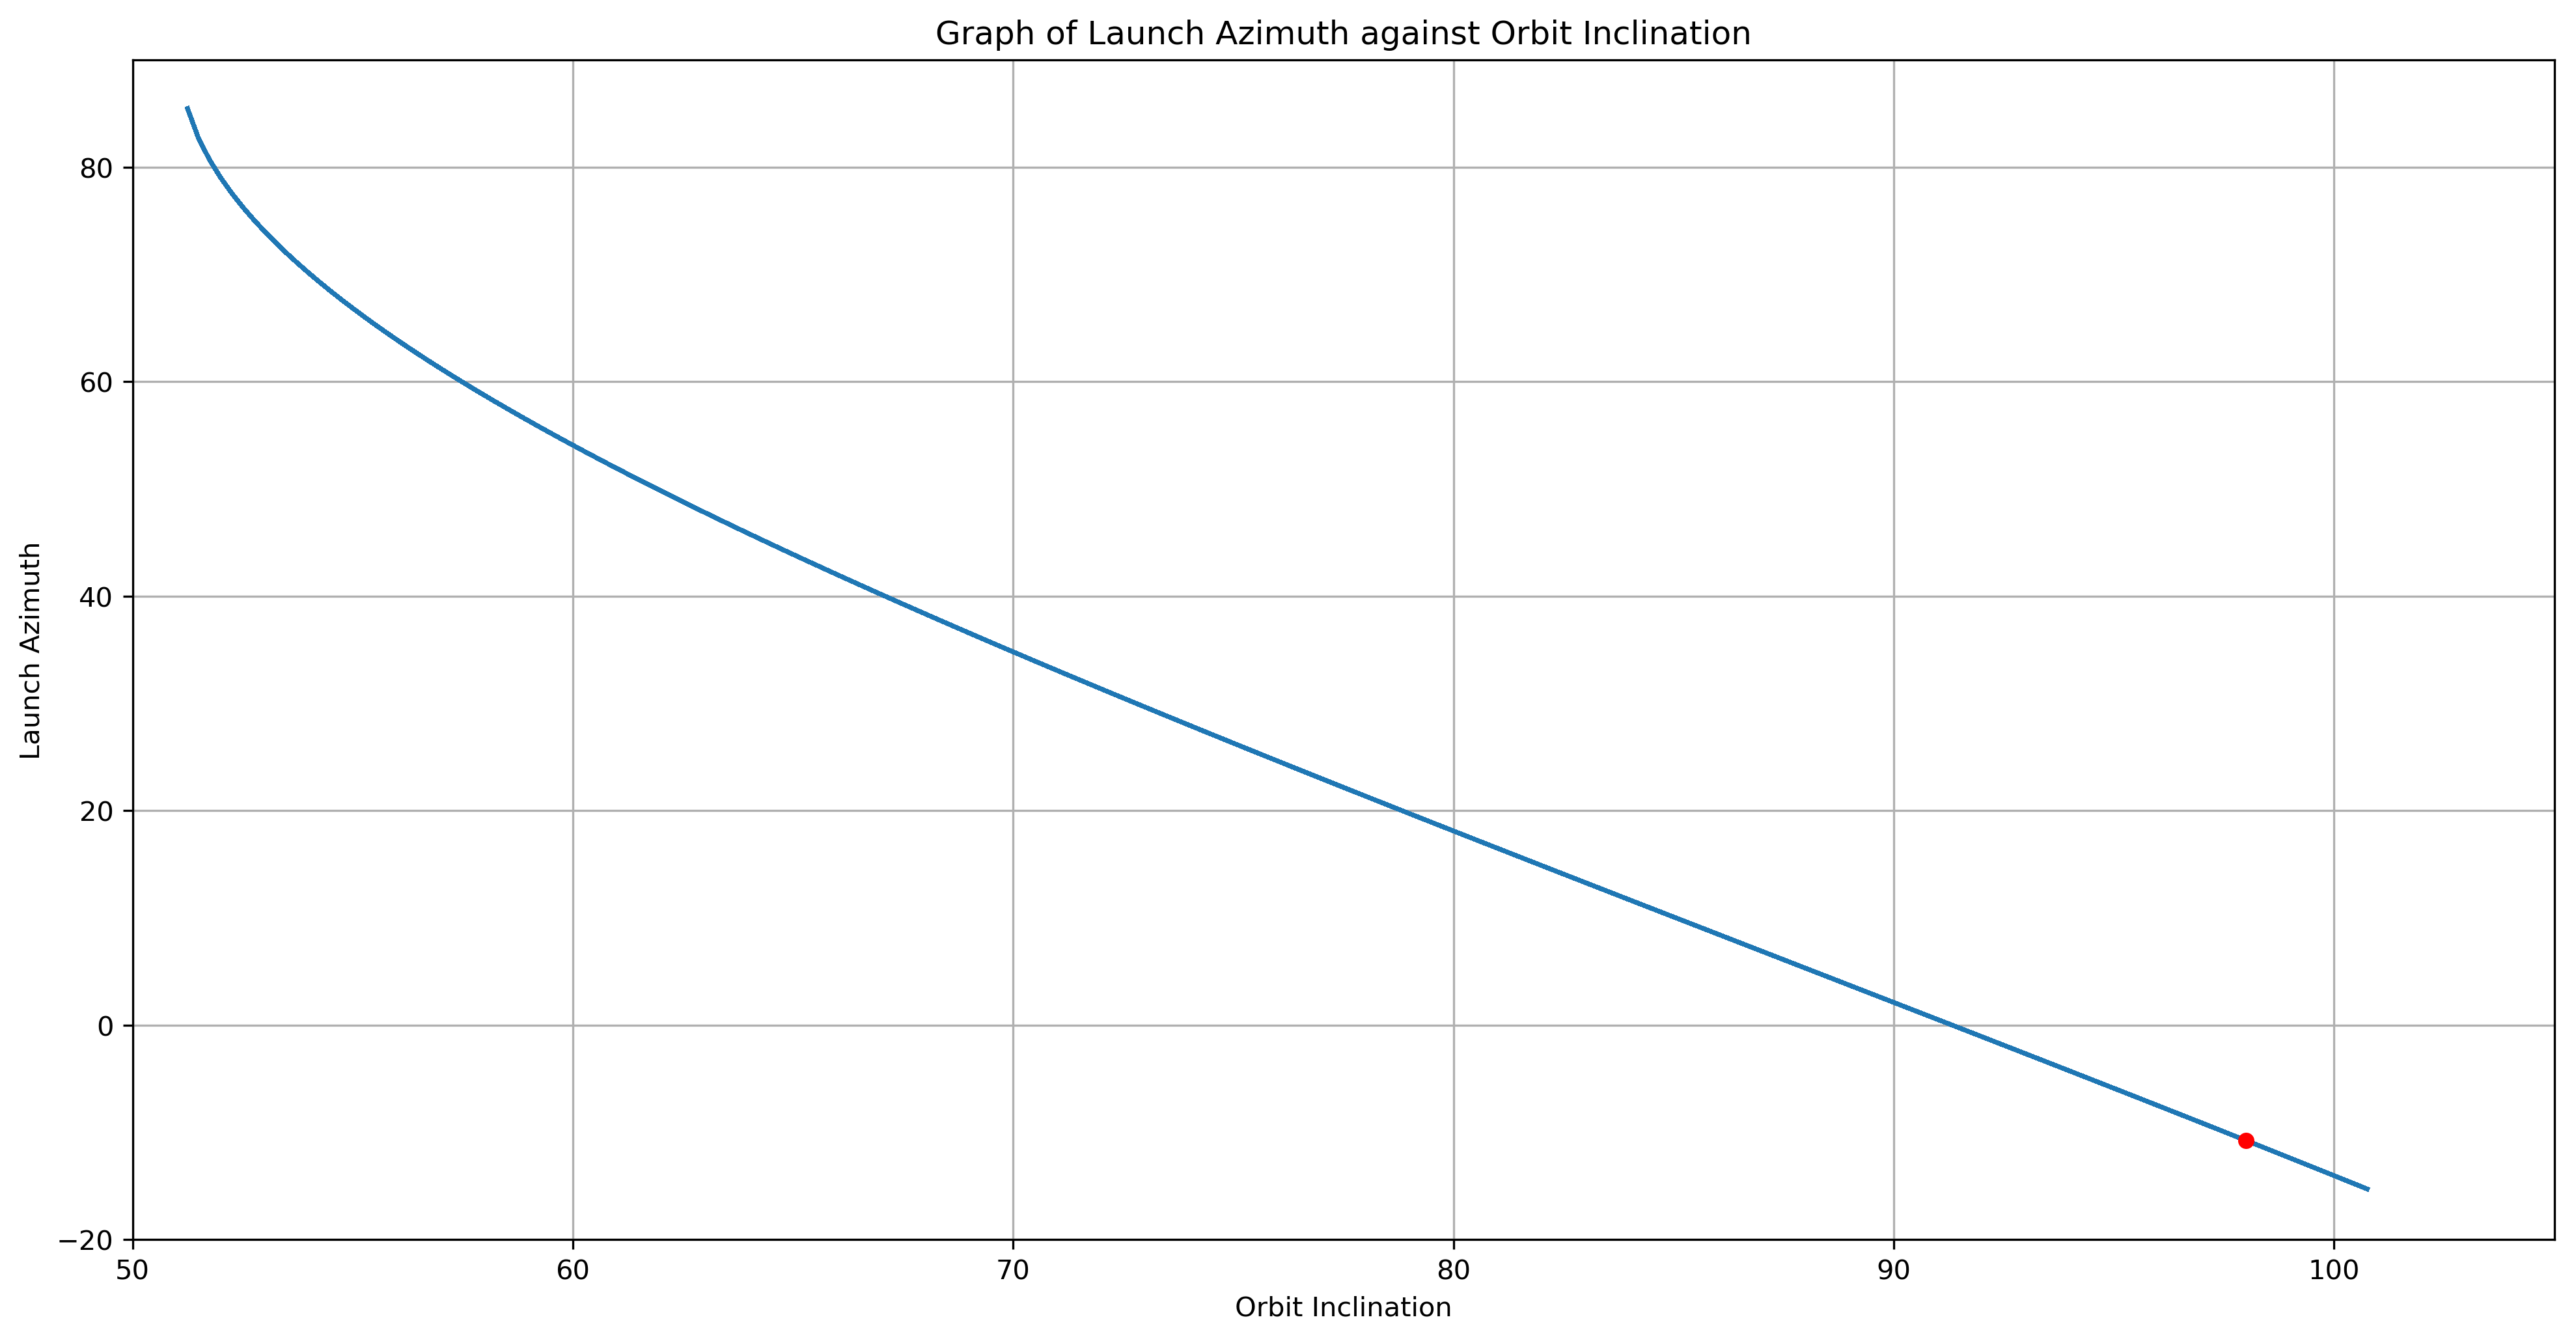

In [10]:
# Plot of Inclination against Launch Azimuth
fig = plt.figure(figsize=(16,8), dpi = 300)

# For Chosen Latitude:
l_a = launch_azimuth(lat,inc)

plt.plot(df.inclination, df.launch_azimuth)
plt.plot(inc, l_a, 'ro', markersize=5)

plt.title('Graph of Launch Azimuth against Orbit Inclination')
plt.xlabel('Orbit Inclination (deg)')
plt.ylabel('Launch Azimuth (deg)')

plt.ylim(-20,90)
plt.xlim(50,105)
plt.grid(True)

plt.show()

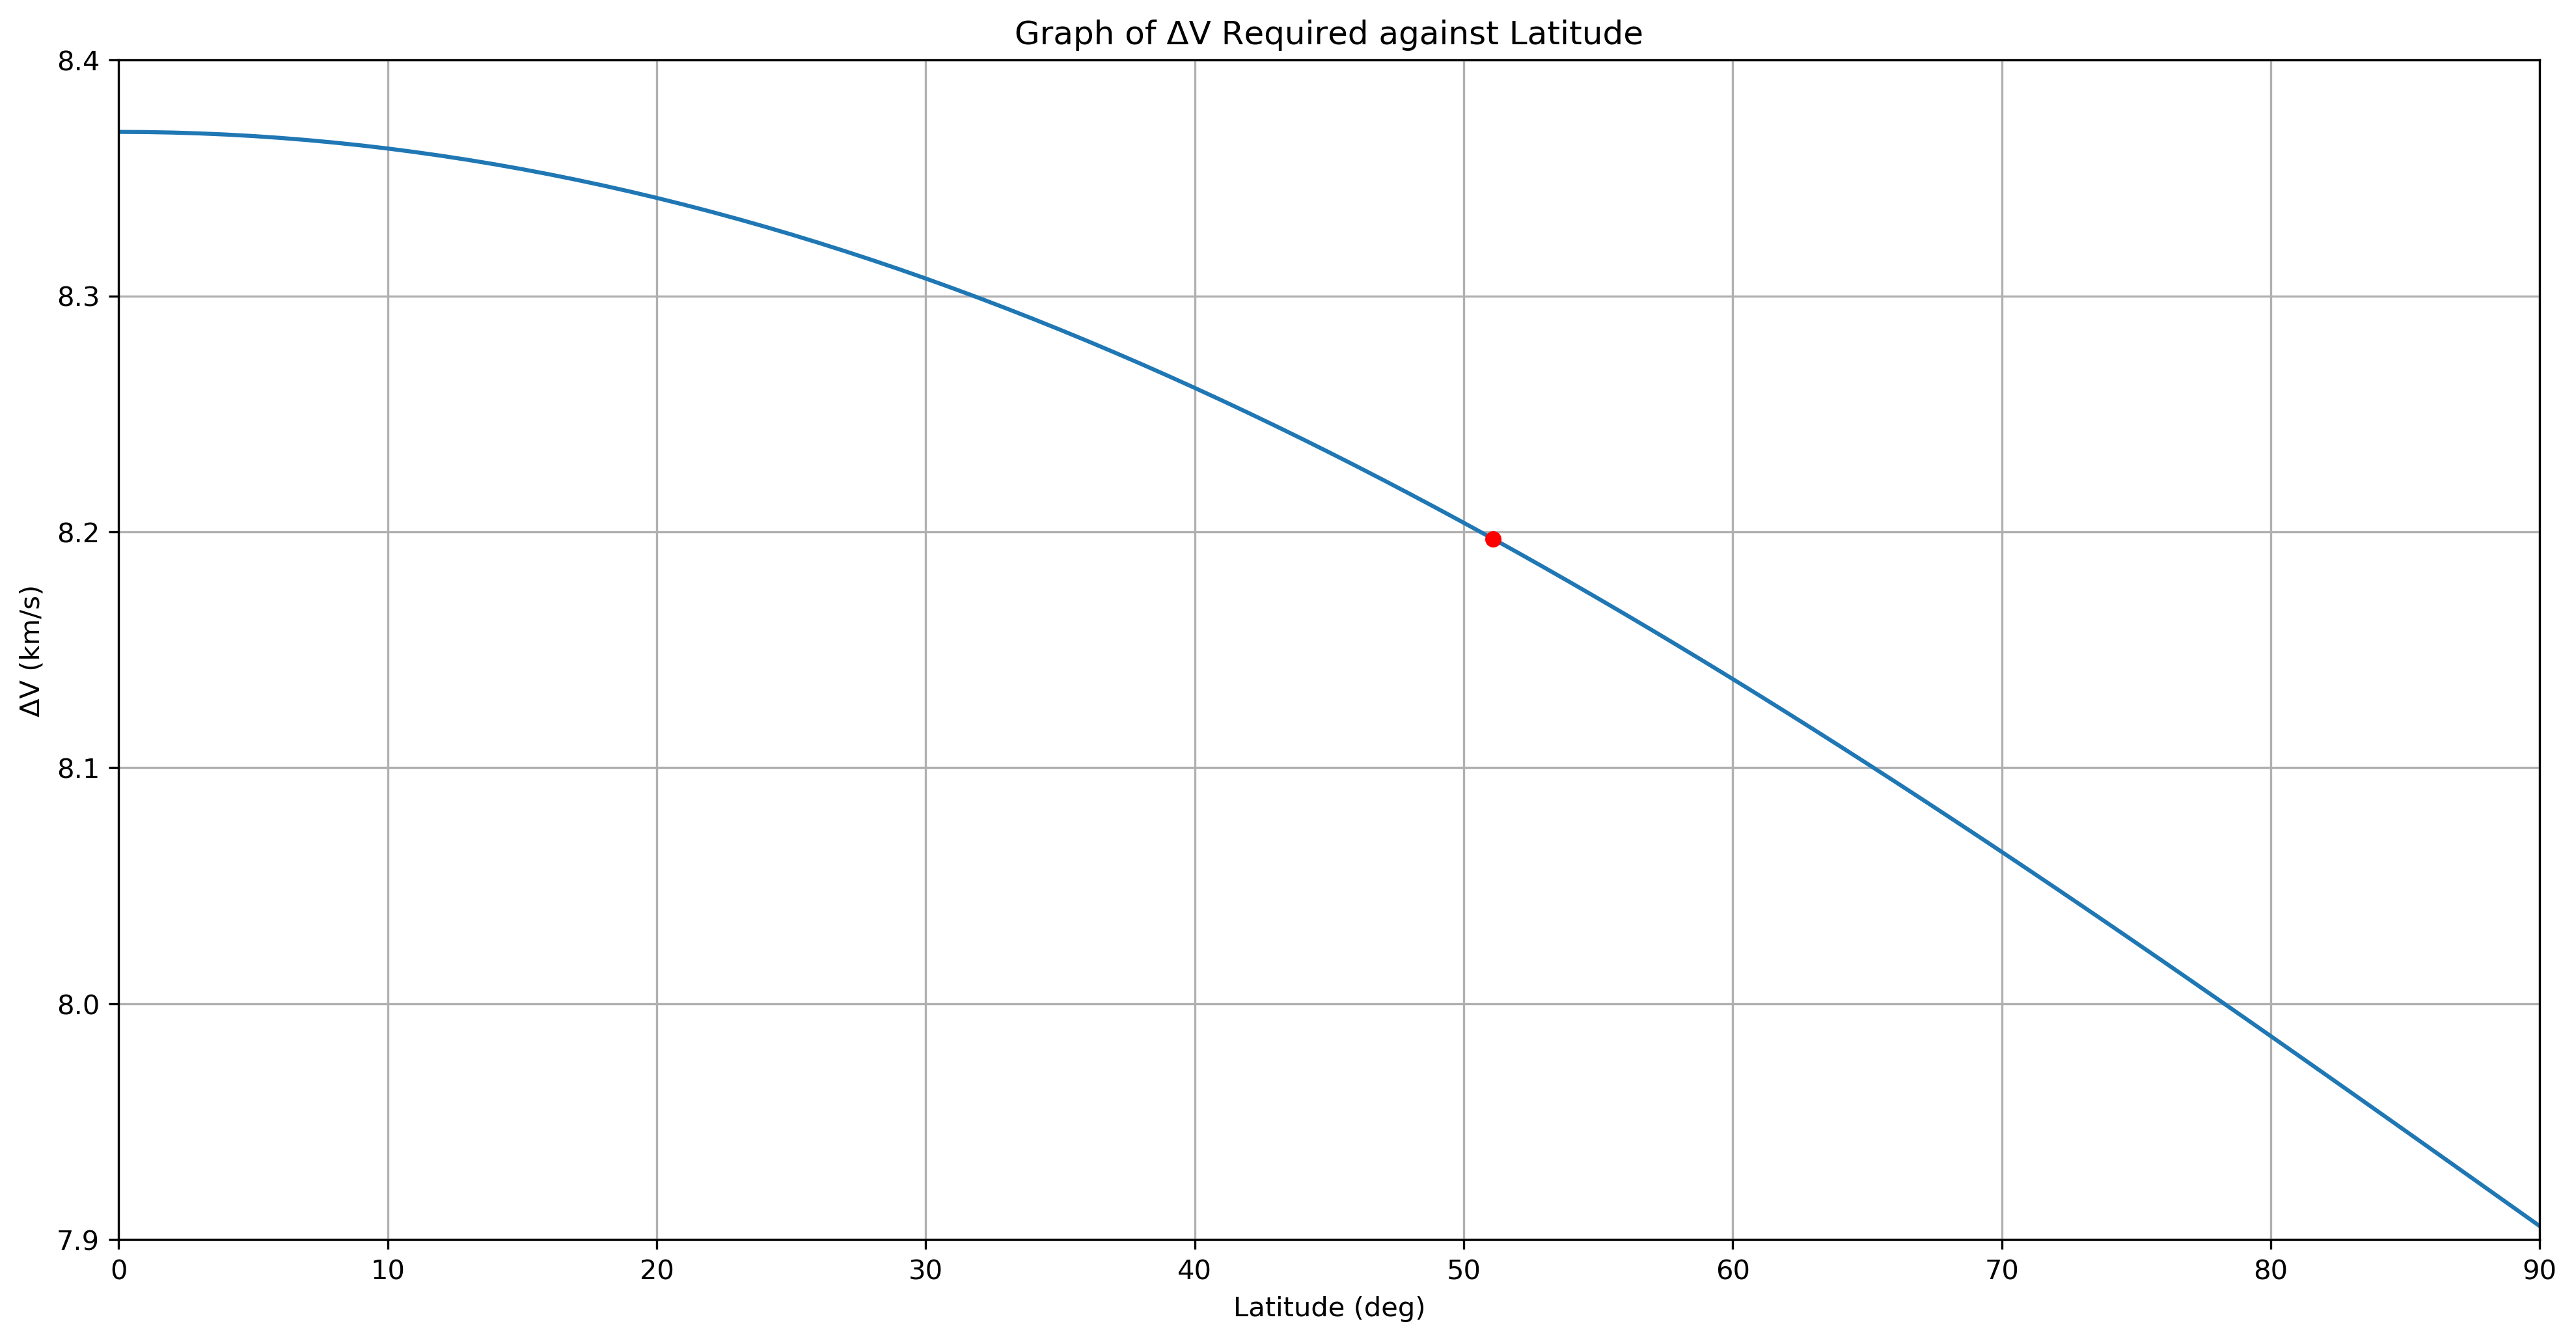

In [11]:
# Plot of ΔV against Latitude
lat_lst = []
dv_lat = []

for i in range(0,101):
    lat_lst.append(i)
    dv_lat.append((dv_orbit(500) + dv_e_rot(500, i))/1000)
    
# For Chosen Latitude:
dv_point = (dv_orbit(500) + dv_e_rot(500, lat))/1000
    
fig = plt.figure(figsize=(16,8), dpi = 300)

plt.plot(lat_lst, dv_lat)
plt.plot(lat, dv_point, 'ro', markersize=5)

plt.title('Graph of ΔV Required against Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('ΔV (km/s)')

plt.xlim(0,90)
plt.ylim(7.9, 8.4)
plt.grid(True)

plt.show()

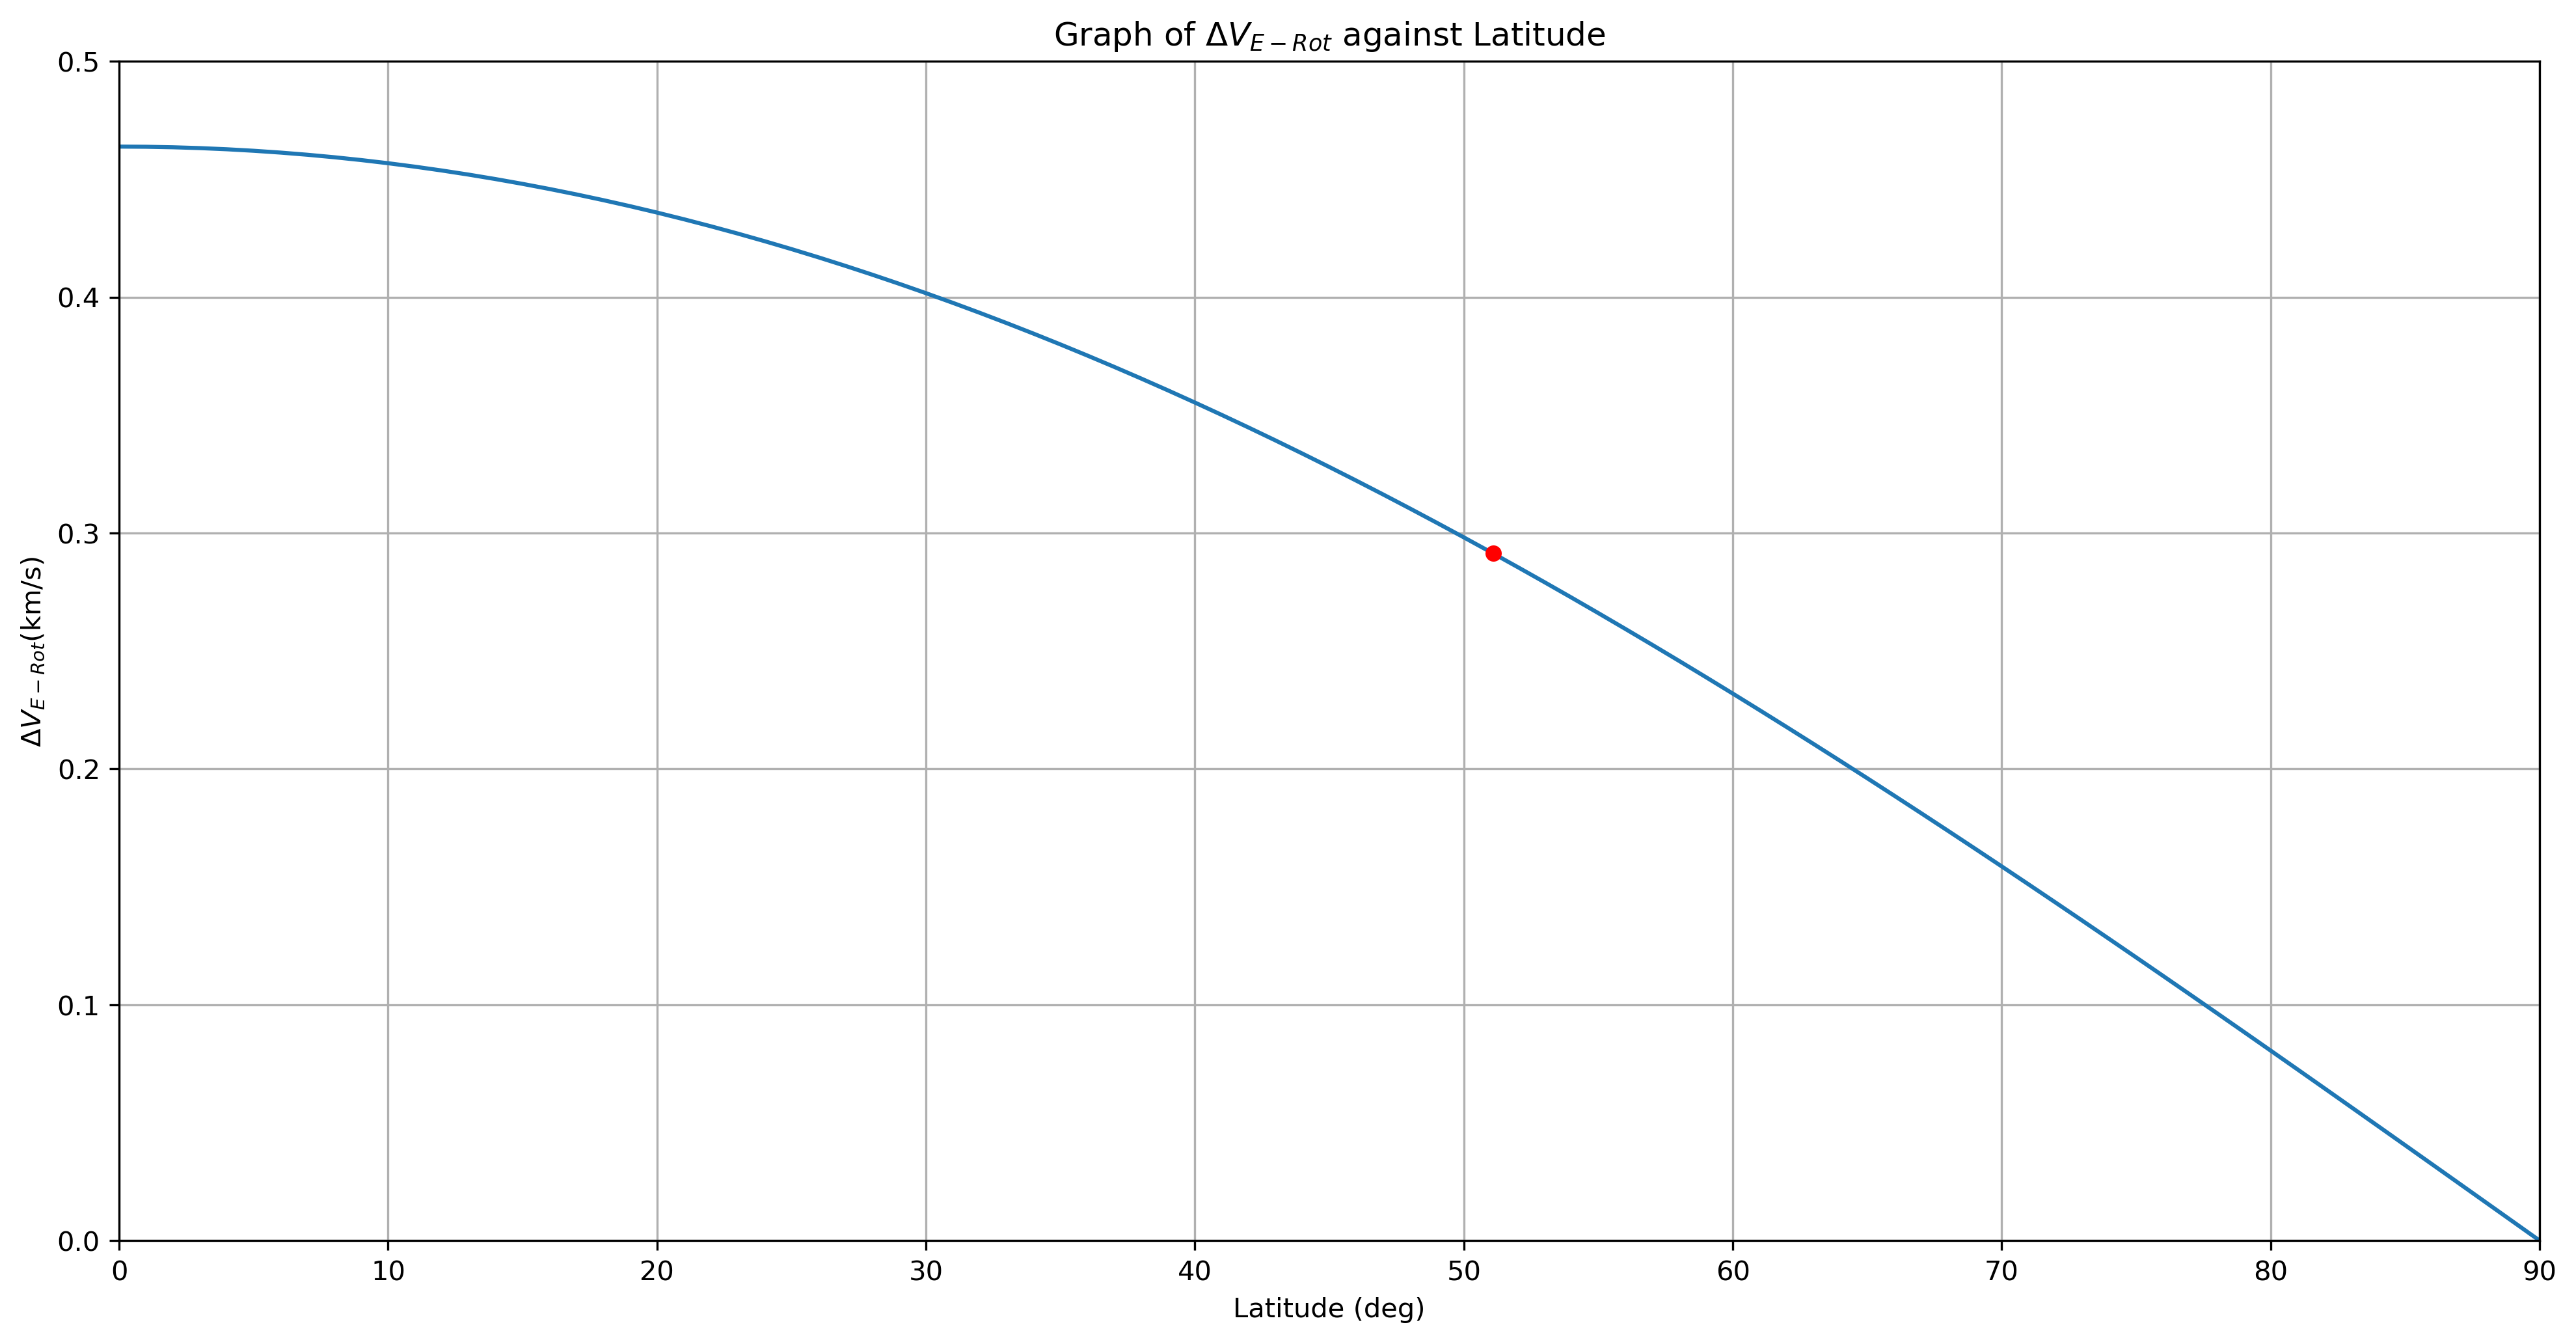

In [12]:
# Plot of ΔV against Latitude
lat_lst = []
dv_lat = []

for i in range(0,91):
    lat_lst.append(i)
    dv_lat.append((dv_e_rot(500, i))/1000)
    
# lat_launch = 51.09388889    

# For Chosen Latitude:
dv_e = dv_e_rot(500, lat)/1000

fig = plt.figure(figsize=(16,8), dpi = 300)

plt.plot(lat_lst, dv_lat)
plt.plot(lat, dv_e, 'ro', markersize=5)

plt.title('Graph of $ΔV_{E-Rot}$ against Latitude')
plt.xlabel('Latitude (deg)')
plt.ylabel('$ΔV_{E-Rot}$(km/s)')

plt.xlim(0,90)
plt.ylim(0,0.5)
plt.grid(True)

plt.show()